# Importing Libraries

In [70]:

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [38]:
data_customer_ratio = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

In [71]:
large_data = pd.read_csv('ecommerce_customer_data_large.csv')

# Reading Dataset

In [40]:
data_customer_ratio.head(3)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0


In [41]:
large_data.head(3)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0


# Merging both datasets

In [42]:
df = pd.concat([data_customer_ratio, large_data], ignore_index=True)

# Again Reading final Dataset

In [43]:
df.head(3)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0


# Shape of the Dataset

In [44]:
print('Dataframe contains',df.shape[0],'rows and',df.shape[1],'columns')

Dataframe contains 500000 rows and 13 columns


# Checking columns

In [45]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

# Changing column names 

In [46]:
new_column_names = {
    'Customer ID': 'Customer_ID',
    'Purchase Date': 'Purchase_Date',
    'Product Category': 'Product_Category',
    'Product Price': 'Product_Price',
    'Quantity': 'Quantity',
    'Total Purchase Amount': 'Total_Purchase_Amount',
    'Payment Method': 'Payment_Method',
    'Customer Age': 'Customer_Age',
    'Returns': 'Returns',
    'Customer Name': 'Customer_Name',
    'Age': 'Age',  
    'Gender': 'Gender',
    'Churn': 'Churn'}
df.rename(columns=new_column_names, inplace=True)

In [47]:
df.head(3)

,Customer_ID,Purchase_Date,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,Payment_Method,Customer_Age,Returns,Customer_Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0


# Info/ Datatypes

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_ID            500000 non-null  int64  
 1   Purchase_Date          500000 non-null  object 
 2   Product_Category       500000 non-null  object 
 3   Product_Price          500000 non-null  int64  
 4   Quantity               500000 non-null  int64  
 5   Total_Purchase_Amount  500000 non-null  int64  
 6   Payment_Method         500000 non-null  object 
 7   Customer_Age           500000 non-null  int64  
 8   Returns                405022 non-null  float64
 9   Customer_Name          500000 non-null  object 
 10  Age                    500000 non-null  int64  
 11  Gender                 500000 non-null  object 
 12  Churn                  500000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 49.6+ MB


# Correcting Datatype

In [49]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df['Age'] = df['Age'].astype(int) 
df['Customer_Age'] = df['Customer_Age'].astype(int)

# Again Checking Datatype corrected or not

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer_ID            500000 non-null  int64         
 1   Purchase_Date          500000 non-null  datetime64[ns]
 2   Product_Category       500000 non-null  object        
 3   Product_Price          500000 non-null  int64         
 4   Quantity               500000 non-null  int64         
 5   Total_Purchase_Amount  500000 non-null  int64         
 6   Payment_Method         500000 non-null  object        
 7   Customer_Age           500000 non-null  int32         
 8   Returns                405022 non-null  float64       
 9   Customer_Name          500000 non-null  object        
 10  Age                    500000 non-null  int32         
 11  Gender                 500000 non-null  object        
 12  Churn                  500000 non-null  int6

# Dropping unnessesory Columns

In [51]:
df.drop('Age',axis = 1,inplace =True)

In [52]:
df.columns

Index(['Customer_ID', 'Purchase_Date', 'Product_Category', 'Product_Price',
       'Quantity', 'Total_Purchase_Amount', 'Payment_Method', 'Customer_Age',
       'Returns', 'Customer_Name', 'Gender', 'Churn'],
      dtype='object')

# 5 point summary/ describing the dataset

In [53]:
df.describe(include = 'number')

,Customer_ID,Product_Price,Quantity,Total_Purchase_Amount,Customer_Age,Returns,Churn
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,405022.000000,500000.000000
mean,25010.834166,254.701118,3.001916,2725.377964,43.869402,0.499343,0.200008
std,14420.386990,141.653230,1.414717,1442.753398,15.357732,0.500000,0.400006
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,0.000000
25%,12545.000000,132.000000,2.000000,1477.000000,30.000000,0.000000,0.000000
50%,25014.000000,255.000000,3.000000,2725.000000,44.000000,0.000000,0.000000
75%,37473.250000,377.000000,4.000000,3974.000000,57.000000,1.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,1.000000


In [54]:
df.describe(include = 'object').T

,count,unique,top,freq
Product_Category,500000,4,Clothing,137633
Payment_Method,500000,4,Credit Card,184033
Customer_Name,500000,70492,Michael Smith,223
Gender,500000,2,Male,250116


# Checking descripecies for the catagorical columns

In [55]:
catagorical_columns = df.select_dtypes(include = 'object')

In [56]:
for i in catagorical_columns:
    print(i)
    print('\n')
    print(df[i].value_counts())
    print('\n')

Product_Category


Product_Category
Clothing       137633
Books          137159
Electronics    112815
Home           112393
Name: count, dtype: int64


Payment_Method


Payment_Method
Credit Card    184033
PayPal         158278
Cash           132906
Crypto          24783
Name: count, dtype: int64


Customer_Name


Customer_Name
Michael Smith        223
Michael Johnson      217
John Smith           195
James Smith          188
Michael Brown        185
                    ... 
Scott Christensen      1
Mrs. Jenna Riley       1
Sherry Beck            1
Angie Koch             1
Angela Norton          1
Name: count, Length: 70492, dtype: int64


Gender


Gender
Male      250116
Female    249884
Name: count, dtype: int64




# Checking missing values

In [57]:
df.isna().sum()

Customer_ID                  0
Purchase_Date                0
Product_Category             0
Product_Price                0
Quantity                     0
Total_Purchase_Amount        0
Payment_Method               0
Customer_Age                 0
Returns                  94978
Customer_Name                0
Gender                       0
Churn                        0
dtype: int64

# Percentage of missing values

In [59]:
df.isna().sum()/df.shape[0] * 100

Customer_ID               0.0000
Purchase_Date             0.0000
Product_Category          0.0000
Product_Price             0.0000
Quantity                  0.0000
Total_Purchase_Amount     0.0000
Payment_Method            0.0000
Customer_Age              0.0000
Returns                  18.9956
Customer_Name             0.0000
Gender                    0.0000
Churn                     0.0000
dtype: float64

# Impute Missing Values

In [66]:
df['Returns'].fillna(df['Returns'].mode()[0],inplace = True)

In [67]:
df.isna().sum()

Customer_ID              0
Purchase_Date            0
Product_Category         0
Product_Price            0
Quantity                 0
Total_Purchase_Amount    0
Payment_Method           0
Customer_Age             0
Returns                  0
Customer_Name            0
Gender                   0
Churn                    0
dtype: int64

# Frequency

In [25]:
df.Product_Category.value_counts()

Product_Category
Clothing       111483
Books          111014
Electronics     91361
Home            91164
Name: count, dtype: int64

In [26]:
df.Payment_Method.value_counts()

Payment_Method
Credit Card    148911
PayPal         128414
Cash           107696
Crypto          20001
Name: count, dtype: int64

In [27]:
df.Gender.value_counts()

Gender
Male      202525
Female    202497
Name: count, dtype: int64

# Checking Duplicate Values

In [28]:
df.duplicated().sum()

0

# Outliers

In [29]:
num_df = df[['Product_Price', 'Quantity', 'Total_Purchase_Amount', 'Customer_Age']]


Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


non_outliers = ~((num_df < lower_bound) | (num_df > upper_bound)).any(axis=1)


print("Outliers found:", (~non_outliers).sum())

Outliers found: 0


# Visualization

#  Boxplots to Detect Outliers (IQR Visual)

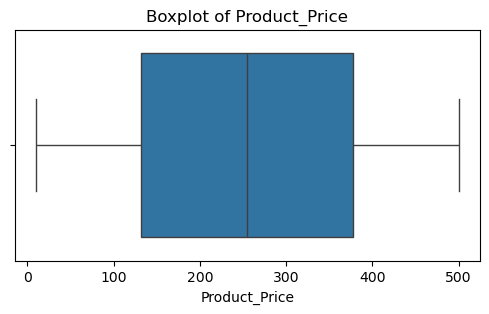

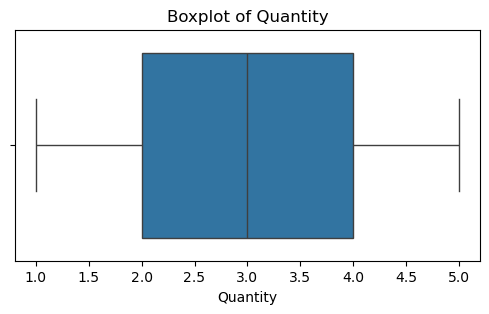

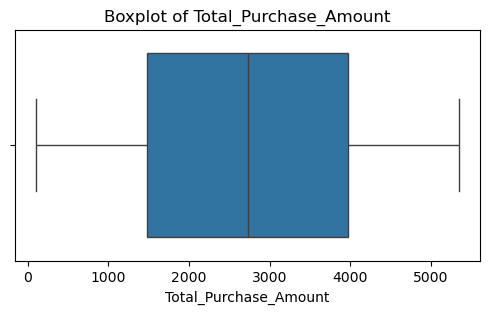

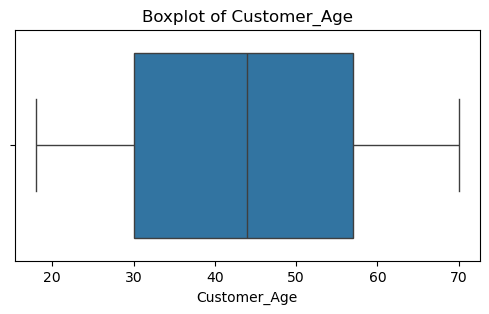

In [30]:
num_cols = ['Product_Price', 'Quantity', 'Total_Purchase_Amount', 'Customer_Age', ]

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Histograms to Check Distributions

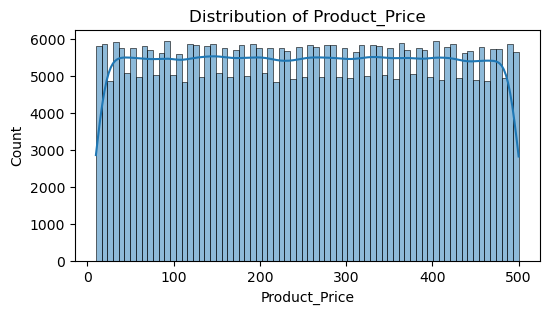

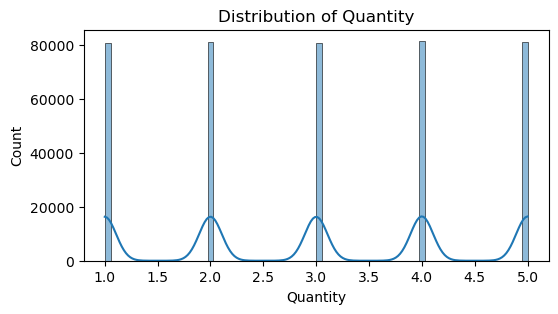

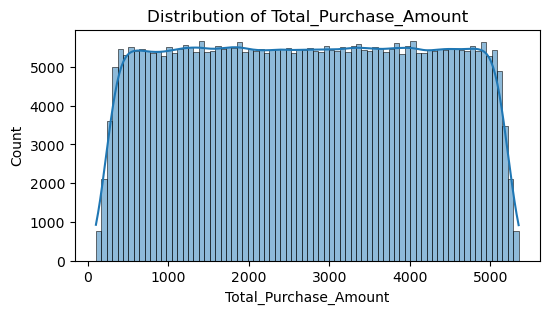

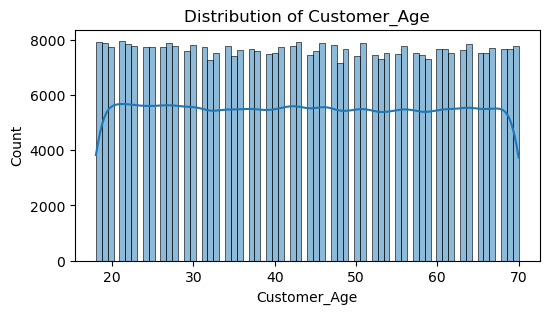

In [31]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Correlation Heatmap

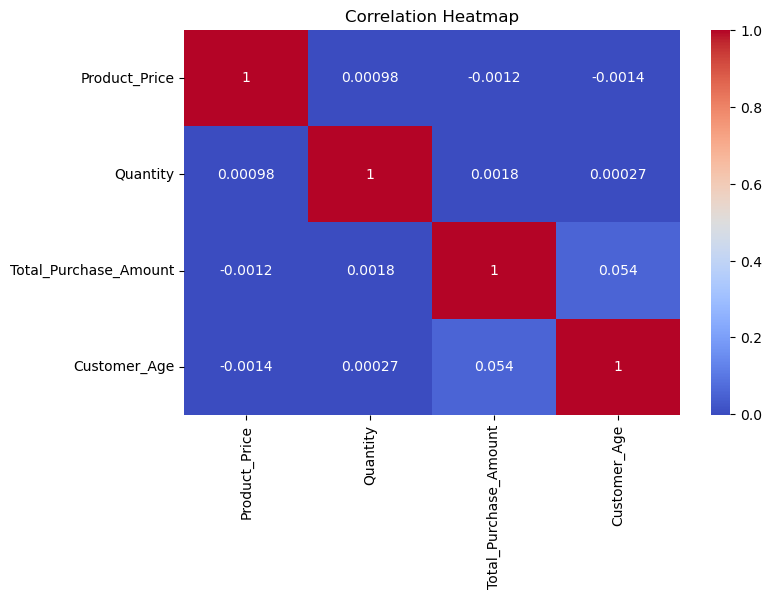

In [32]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Countplots for Categorical Columns

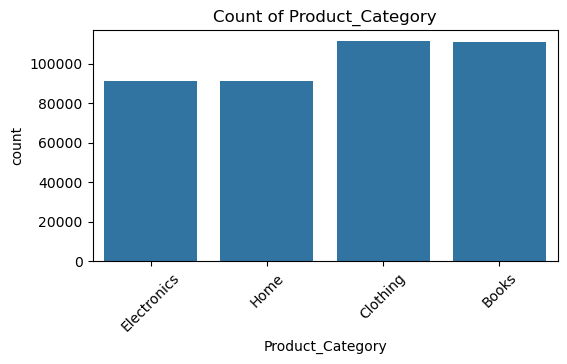

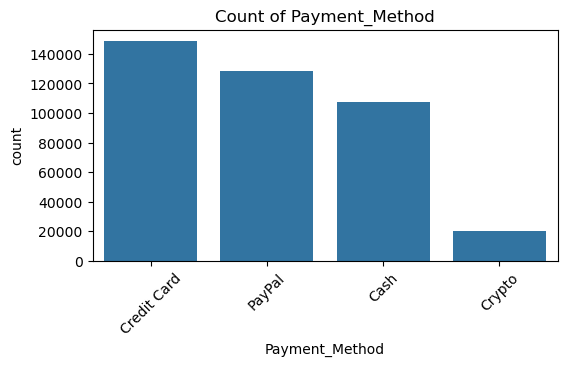

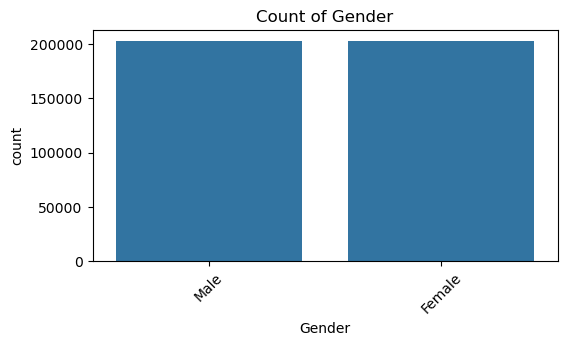

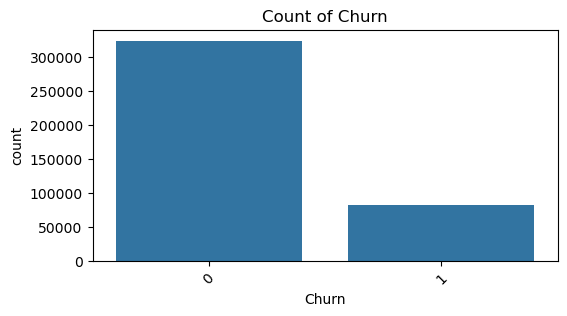

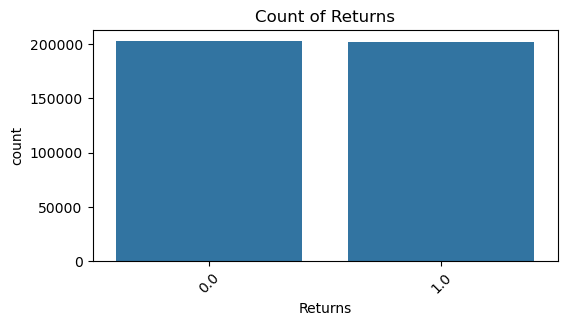

In [33]:
cat_cols = ['Product_Category', 'Payment_Method', 'Gender', 'Churn', 'Returns']

for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Relationship Between Features

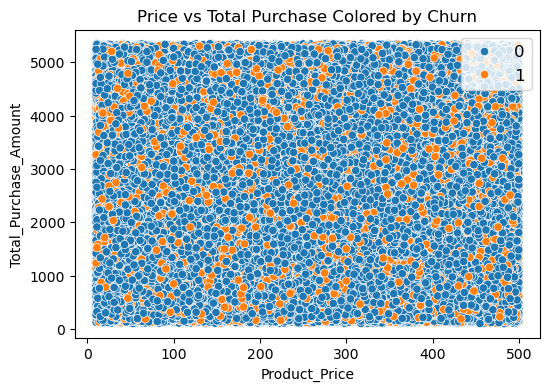

In [68]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Product_Price', y='Total_Purchase_Amount', hue='Churn',data=df)
plt.title("Price vs Total Purchase Colored by Churn")
plt.legend(loc='upper right', fontsize=12)
plt.show()

#  Barplot: Avg Purchase Amount by Gender

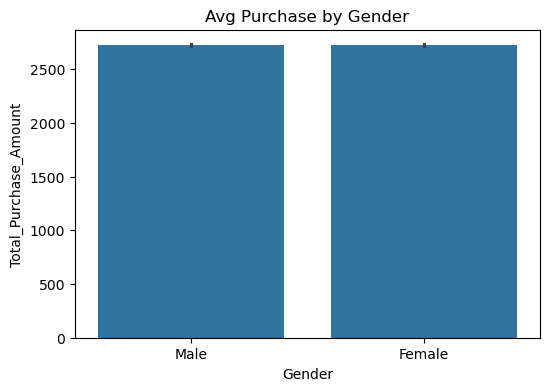

In [69]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Total_Purchase_Amount', data=df)
plt.title("Avg Purchase by Gender")
plt.show()